In [2]:
#necessary imports
import matplotlib.pyplot as plt 
from sklearn import metrics
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

In [3]:
#read dataset
from sklearn.datasets import load_iris

#create object
iris=load_iris()

#create dataframe
df=pd.DataFrame(iris.data)

#get column names
df.columns=iris.feature_names

In [4]:
#see the first five rows of data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#add target to dataframe
df['species']=iris.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


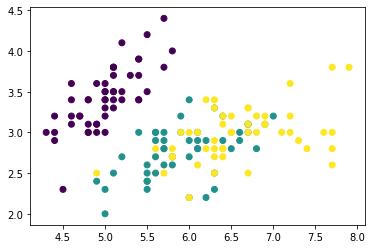

In [9]:
#plot sepal length vs sepal width
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],c=df['species'])
plt.show()

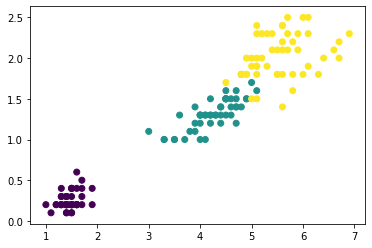

In [10]:
#plot petal length vs petal width
plt.scatter(df['petal length (cm)'],df['petal width (cm)'],c=df['species'])
plt.show()

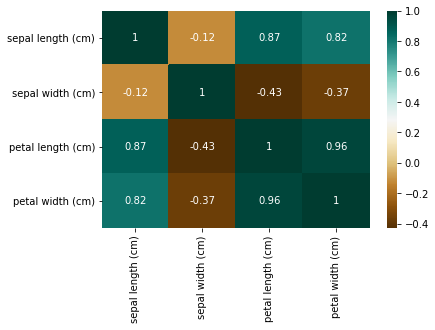

In [11]:
#plot correlation between features

c=df.drop('species',axis=1).corr()
sns.heatmap(c,cmap='BrBG',annot=True)

In [12]:
duplicates=df[df.duplicated()]
print("Number of duplicate rows: ",duplicates.shape)

Number of duplicate rows:  (1, 5)


In [13]:
df=df.drop_duplicates() #drop duplicate rows

df.count()

sepal length (cm)    149
sepal width (cm)     149
petal length (cm)    149
petal width (cm)     149
species              149
dtype: int64

In [14]:
#check for null entries
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

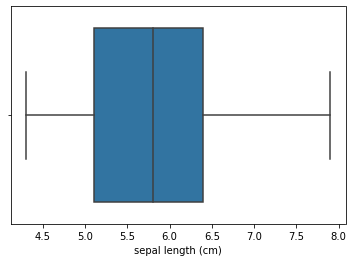

In [15]:
#create box plot of each feature
sns.boxplot(x=df['sepal length (cm)'])

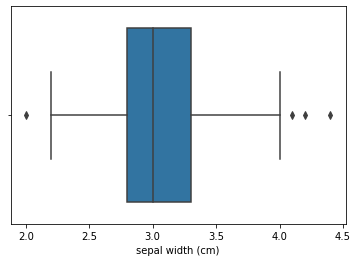

In [16]:
sns.boxplot(x=df['sepal width (cm)'])

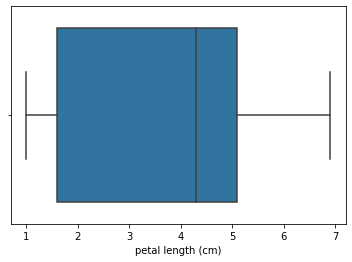

In [17]:
sns.boxplot(x=df['petal length (cm)'])

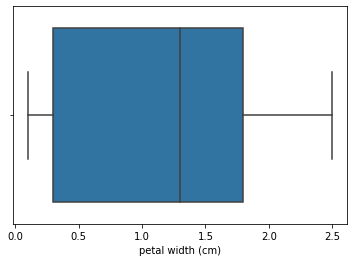

In [18]:
sns.boxplot(x=df['petal width (cm)'])

In [19]:
#detect outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)

IRQ=Q3-Q1

print(IRQ)

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
species              2.0
dtype: float64


In [20]:
#remove outliers
df=df[~((df< (Q1-1.5*IRQ)) | (df>(Q3+1.5*IRQ))).any(axis=1)]

df.shape

(145, 5)

In [21]:
def calculateMetrics(model,X,y,train_test):
    print('The '+train_test+' accuracy of model: ',metrics.accuracy_score(model.predict(X),y))
    print('The '+train_test+ ' logloss of the model: ',metrics.log_loss(y,model.predict_proba(X)))

In [22]:
from sklearn.linear_model import LogisticRegression

X=df.drop('species',axis=1)
y=df['species']

#split test and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#create model
logReg=LogisticRegression()

#fit model to train data
logReg.fit(X_train,y_train)

#calculate metrics
calculateMetrics(logReg,X_train,y_train,"training")

#calculate test metrics
calculateMetrics(logReg,X_test,y_test,"test")

The training accuracy of model:  0.9801980198019802
The training logloss of the model:  0.15122920453879332
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  0.11211777308126952


In [23]:
#train with sepal data alone
X_sepal_train=X_train[['sepal length (cm)','sepal width (cm)']]
X_sepal_test=X_test[['sepal length (cm)','sepal width (cm)']]

#instantiate the model
logReg_sepal=LogisticRegression()

#fit model to train data
logReg_sepal.fit(X_sepal_train,y_train)

#calculate metrics
calculateMetrics(logReg_sepal,X_sepal_train,y_train,"training")

#calculate test metrics
calculateMetrics(logReg_sepal,X_sepal_test,y_test,"test")

The training accuracy of model:  0.7722772277227723
The training logloss of the model:  0.48914073161044513
The test accuracy of model:  0.8409090909090909
The test logloss of the model:  0.4425240478731933


In [24]:
#train with petal data alone
X_petal_train=X_train[['petal length (cm)','petal width (cm)']]
X_petal_test=X_test[['petal length (cm)','petal width (cm)']]

#instantiate the model
logReg_petal=LogisticRegression()

#fit model to train data
logReg_petal.fit(X_petal_train,y_train)

#calculate metrics
calculateMetrics(logReg_petal,X_petal_train,y_train,"training")

#calculate test metrics
calculateMetrics(logReg_petal,X_petal_test,y_test,"test")

The training accuracy of model:  0.9702970297029703
The training logloss of the model:  0.16436045707208247
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  0.12038548104050499


In [25]:
#train with decsion tree classifier
from sklearn import tree

#create an object
clf=tree.DecisionTreeClassifier(random_state=42)

#fit to train data
clf.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(clf,X_train,y_train,"training")

#calculate test metrics
calculateMetrics(clf,X_test,y_test,"test")

#print the number of nodes and levels in tree before pruning
print("number of nodes before pruning: ",clf.tree_.node_count)
print("maximum depth before pruning: ",clf.tree_.max_depth)

The training accuracy of model:  1.0
The training logloss of the model:  2.1094237467878e-15
The test accuracy of model:  0.9318181818181818
The test logloss of the model:  2.3549165723802754
number of nodes before pruning:  9
maximum depth before pruning:  4


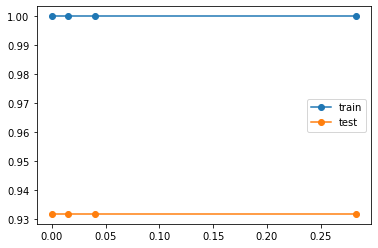

In [26]:
#post prune the tree 
path=clf.cost_complexity_pruning_path(X_train,y_train)

#get effective alphas for the tree
ccp_alphas,impurities=path.ccp_alphas,path.impurities

clfs=[]

#train the tree with each ccp_alpha
for ccp_alpha in ccp_alphas:
    clf_pruned=tree.DecisionTreeClassifier(random_state=42,ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train,y_train)
    clfs.append(clf)

#remove the last tree
clfs=clfs[:-1]
ccp_alphas=ccp_alphas[:-1]

#calculate the training and test scores of each tree
train_score=[clf.score(X_train,y_train) for clf in clfs]
test_score=[clf.score(X_test,y_test) for clf in clfs]

#plot train score and test score vs alpha
plt.plot(ccp_alphas,train_score,marker='o',label='train',drawstyle='steps-post')
plt.plot(ccp_alphas,test_score,marker='o',label='test',drawstyle='steps-post')
plt.legend()
plt.show()

In [27]:
#ccp_alpha of 0.03 maximise the test accuracy 

clf_pruned=tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.03)

#fit the model
clf_pruned.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(clf_pruned,X_train,y_train,"training")

#calculate test metrics
calculateMetrics(clf_pruned,X_test,y_test,"test")

#print number of nodes and depth
print("number of nodes after pruning: ",clf_pruned.tree_.node_count)
print("max depth after pruning: ",clf_pruned.tree_.max_depth)

The training accuracy of model:  0.9900990099009901
The training logloss of the model:  0.02227069879678656
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  1.576482610506209
number of nodes after pruning:  7
max depth after pruning:  3


In [28]:
#train using random forest classifier
from sklearn.ensemble import RandomForestClassifier

#instantiate the model
rf=RandomForestClassifier()

#fit the training data
rf.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(rf,X_train,y_train,"training")

#calcualte test metrics
calculateMetrics(rf,X_test,y_test,"test")

The training accuracy of model:  1.0
The training logloss of the model:  0.026236859927564637
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  0.1866230241606721


In [29]:
#go for hyper parameter tuning to avoid overfitting

#get the hyper parameters
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [30]:
#intialize the hyper parameter
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]

max_features=['sqrt','log2']

max_depth=[int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)

min_samples_split=[2,5,10]

min_samples_leaf=[1,2,4]

boot_strap=[True,False]

param_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,'min_samples_split':min_samples_split,
           'min_samples_leaf':min_samples_leaf,'bootstrap':boot_strap}

In [31]:
#import randomized search cv
from sklearn.model_selection import RandomizedSearchCV

#instantiate randomized search cv
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,n_iter=100,cv=5,random_state=42,n_jobs=-1)

#fit the model
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [32]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 80,
 'bootstrap': False}

In [33]:
rf_best_random=RandomForestClassifier(bootstrap=True,n_estimators=400,min_samples_split=5,min_samples_leaf=1,max_features='log2',
                                      max_depth=30)
rf_best_random.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(rf_best_random,X_train,y_train,"training")

#calcualte test metrics
calculateMetrics(rf_best_random,X_test,y_test,"test")      

The training accuracy of model:  0.9900990099009901
The training logloss of the model:  0.04065386200794742
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  0.169291704781561


In [34]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':range(300,500,50),'min_samples_split':[3,4,5],'min_samples_leaf':[1,2,3],'max_features':['sqrt','auto','log2'],
           'max_depth':range(20,40,5)}

rf_grid=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5,n_jobs=-1)

In [35]:
rf_grid.fit(X_train,y_train)

rf_grid.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 350}

In [36]:
rf_grid_best=RandomForestClassifier(max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=4,n_estimators=300)

#fit the model
rf_grid_best.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(rf_grid_best,X_train,y_train,"training")

#calcualte test metrics
calculateMetrics(rf_grid_best,X_test,y_test,"test")

The training accuracy of model:  1.0
The training logloss of the model:  0.0356817395090303
The test accuracy of model:  0.9545454545454546
The test logloss of the model:  0.15527583050834098


In [37]:
#train using svm
from sklearn.svm import SVC

svm=SVC(probability=True)

#fit the model
svm.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(svm,X_train,y_train,"training")

#calcualte test metrics
calculateMetrics(svm,X_test,y_test,"test")

The training accuracy of model:  0.9306930693069307
The training logloss of the model:  0.12098741442735211
The test accuracy of model:  1.0
The test logloss of the model:  0.08889037085694786


In [38]:
#train using Knearest neighbours
from sklearn.neighbors import KNeighborsClassifier

#instantiate the model
knn=KNeighborsClassifier(n_neighbors=3)

#fit the model
knn.fit(X_train,y_train)

#calculate training metrics
calculateMetrics(knn,X_train,y_train,"training")

#calcualte test metrics
calculateMetrics(knn,X_test,y_test,"test")

The training accuracy of model:  0.9504950495049505
The training logloss of the model:  0.06241575900551567
The test accuracy of model:  0.9772727272727273
The test logloss of the model:  0.8034024229801613


In [57]:
models=[logReg,clf,clf_pruned,rf,rf_best_random,rf_grid_best]

M=['logReg','Decision tree','Decision tree pruned','Random forest', 'Random forest randomSearchCV','Random Forest gridSearchCV']

#calculate the accuracy
train_accuracy=[metrics.accuracy_score(model.predict(X_train),y_train) for model in models]
test_accuracy=[metrics.accuracy_score(model.predict(X_test),y_test) for model in models]

#calcluate the log loss of the models
train_loss=[metrics.log_loss(y_train,model.predict_proba(X_train)) for model in models]
test_loss=[metrics.log_loss(y_test,model.predict_proba(X_test)) for model in models]

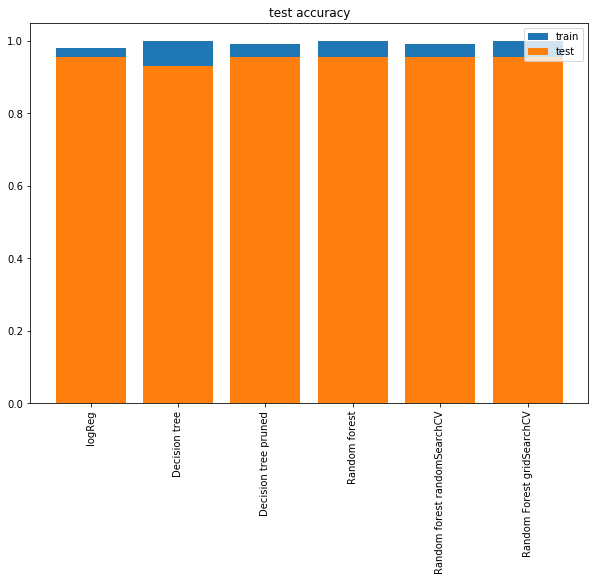

In [90]:
plt.figure(figsize=(10,7))
plt.bar(range(len(train_accuracy)),train_accuracy)
plt.title("training and testing accuracy')
plt.xticks(range(len(train_accuracy)),M,rotation='vertical')
plt.bar(range(len(test_accuracy)),test_accuracy)
plt.xticks(range(len(test_accuracy)),M,rotation='vertical')
plt.legend(('train','test'))
plt.show()

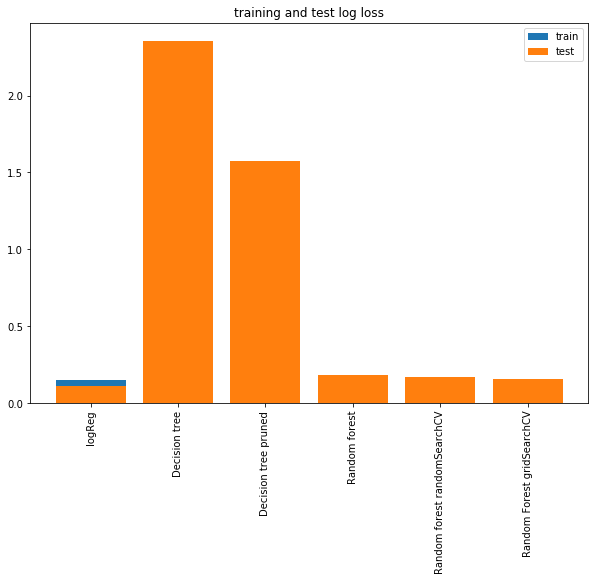

In [91]:
plt.figure(figsize=(10,7))
plt.bar(range(len(train_loss)),train_loss)
plt.title("training and test log loss")
plt.xticks(range(len(train_loss)),M,rotation='vertical')
plt.bar(range(len(test_loss)),test_loss)
plt.xticks(range(len(test_loss)),M,rotation='vertical')
plt.legend(('train','test'))
plt.show()